## EDA: Movies recomendation

Importamos el dataset, vemos tamaño.

In [176]:
import pandas as pd

data = pd.read_csv("Dataset/data_merge.csv")
print(data.shape)

(45452, 21)


Identificamos duplicados y los eliminamos:

In [177]:
duplicados = data.duplicated(subset=["title", "release_year","id"])
duplicados[duplicados == True].index

Index([  677,   838,   950,  1466,  1467,  2567,  4116,  4359,  5134,  5540,
       ...
       40051, 40052, 40285, 40286, 44811, 44812, 44817, 44818, 45253, 45254],
      dtype='int64', length=106)

In [178]:
data.drop_duplicates(subset=["title", "release_year","id"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45452 entries, 0 to 45451
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4497 non-null   object 
 1   budget                 45452 non-null  int64  
 2   genres                 45452 non-null  object 
 3   id                     45452 non-null  int64  
 4   original_language      45441 non-null  object 
 5   overview               44511 non-null  object 
 6   popularity             45452 non-null  float64
 7   production_companies   45452 non-null  object 
 8   production_countries   45452 non-null  object 
 9   release_date           45452 non-null  object 
 10  revenue                45452 non-null  float64
 11  runtime                45206 non-null  float64
 12  spoken_languages       45452 non-null  object 
 13  status                 45372 non-null  object 
 14  tagline                20425 non-null  object 
 15  ti

Eliminamos la columna id y transformamos 5 columnas a lista:

In [179]:
data.drop(columns=["id"], inplace=True)

In [180]:
import ast
import numpy as np

list_col = ["genres", "production_companies", "production_countries", "spoken_languages"]

for name in list_col:
    data[name] = data[name].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else np.nan)
    data[name] = data[name].apply(lambda x: [n["name"] for n in x])

data["director"] = data["director"].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else np.nan)

data.head(3)

,belongs_to_collection,budget,genres,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,return,release_year,director
0,Toy Story Collection,30000000,"[Animation, Comedy, Family]",en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,7.7,5415.0,12.451801,1995,[John Lasseter]
1,NaN,65000000,"[Adventure, Fantasy, Family]",en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,4.043035,1995,[Joe Johnston]
2,Grumpy Old Men Collection,0,"[Romance, Comedy]",en,A family wedding reignites the ancient feud be...,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,101.0,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,0.000000,1995,[Howard Deutch]


Vemos qué tipos de datos tenemos en nuestro dataset y las categorías de status y original_lenguage:

In [130]:
data.dtypes

belongs_to_collection     object
budget                     int64
genres                    object
original_language         object
overview                  object
popularity               float64
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
vote_average             float64
vote_count               float64
return                   float64
release_year               int64
director                  object
dtype: object

In [131]:
print(data['original_language'].unique())
print(data['status'].unique())

['en' 'fr' 'zh' 'it' 'fa' 'nl' 'de' 'cn' 'ar' 'es' 'ru' 'sv' 'ja' 'ko'
 'sr' 'bn' 'he' 'pt' 'wo' 'ro' 'hu' 'cy' 'vi' 'cs' 'da' 'no' 'nb' 'pl'
 'el' 'sh' 'xx' 'mk' 'bo' 'ca' 'fi' 'th' 'sk' 'bs' 'hi' 'tr' 'is' 'ps'
 'ab' 'eo' 'ka' 'mn' 'bm' 'zu' 'uk' 'af' 'la' 'et' 'ku' 'fy' 'lv' 'ta'
 'sl' 'tl' 'ur' 'rw' 'id' 'bg' 'mr' 'lt' 'kk' 'ms' 'sq' nan 'qu' 'te' 'am'
 'jv' 'tg' 'ml' 'hr' 'lo' 'ay' 'kn' 'eu' 'ne' 'pa' 'ky' 'gl' 'uz' 'sm'
 'mt' 'hy' 'iu' 'lb' 'si']
['Released' nan 'Rumored' 'Post Production' 'In Production' 'Planned'
 'Canceled']


Estadística descritiva de variables numéricas:

In [132]:
data.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,return,release_year
count,4.534600e+04,45346.000000,4.534600e+04,45100.000000,45346.000000,45346.000000,4.534600e+04,45346.000000
mean,4.232580e+06,2.926188,1.123366e+07,94.177805,5.624196,110.135293,6.604792e+02,1991.882834
std,1.744373e+07,6.010970,6.440990e+07,38.348775,1.915339,491.899276,7.471800e+04,24.053040
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,1874.000000
25%,0.000000e+00,0.388732,0.000000e+00,85.000000,5.000000,3.000000,0.000000e+00,1978.000000
50%,0.000000e+00,1.130176,0.000000e+00,95.000000,6.000000,10.000000,0.000000e+00,2001.000000
75%,0.000000e+00,3.689337,0.000000e+00,107.000000,6.800000,34.000000,0.000000e+00,2010.000000
max,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,1.239638e+07,2020.000000


Vemos nulos y listas vacías para tener en cuenta en el modelado:

In [133]:
data.isna().sum()

belongs_to_collection    40861
budget                       0
genres                       0
original_language           11
overview                   941
popularity                   0
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                    246
spoken_languages             0
status                      80
tagline                  24959
title                        0
vote_average                 0
vote_count                   0
return                       0
release_year                 0
director                   724
dtype: int64

In [134]:
list_col = ["genres", "production_companies", "production_countries", "spoken_languages"]
nulos = {}

for name in list_col:
    nulos[name] = data[data[name].apply(len) == 0].shape[0]

nulos

{'genres': 2384,
 'production_companies': 11789,
 'production_countries': 6208,
 'spoken_languages': 3766}

Relación entre variables: <br> 
Me preguntaba si había alguna relación entre algunas variables numéricas y la puntuación recibida, la cual transformé a variablecategórica para efectos de visualizar este cuestionamiento.

In [148]:
data['vote_int'] = data['vote_average'].apply(lambda x: str(round(x,0)))
data['vote_int'].unique()

array(['8.0', '7.0', '6.0', '5.0', '4.0', '3.0', '0.0', '10.0', '2.0',
       '9.0', '1.0'], dtype=object)

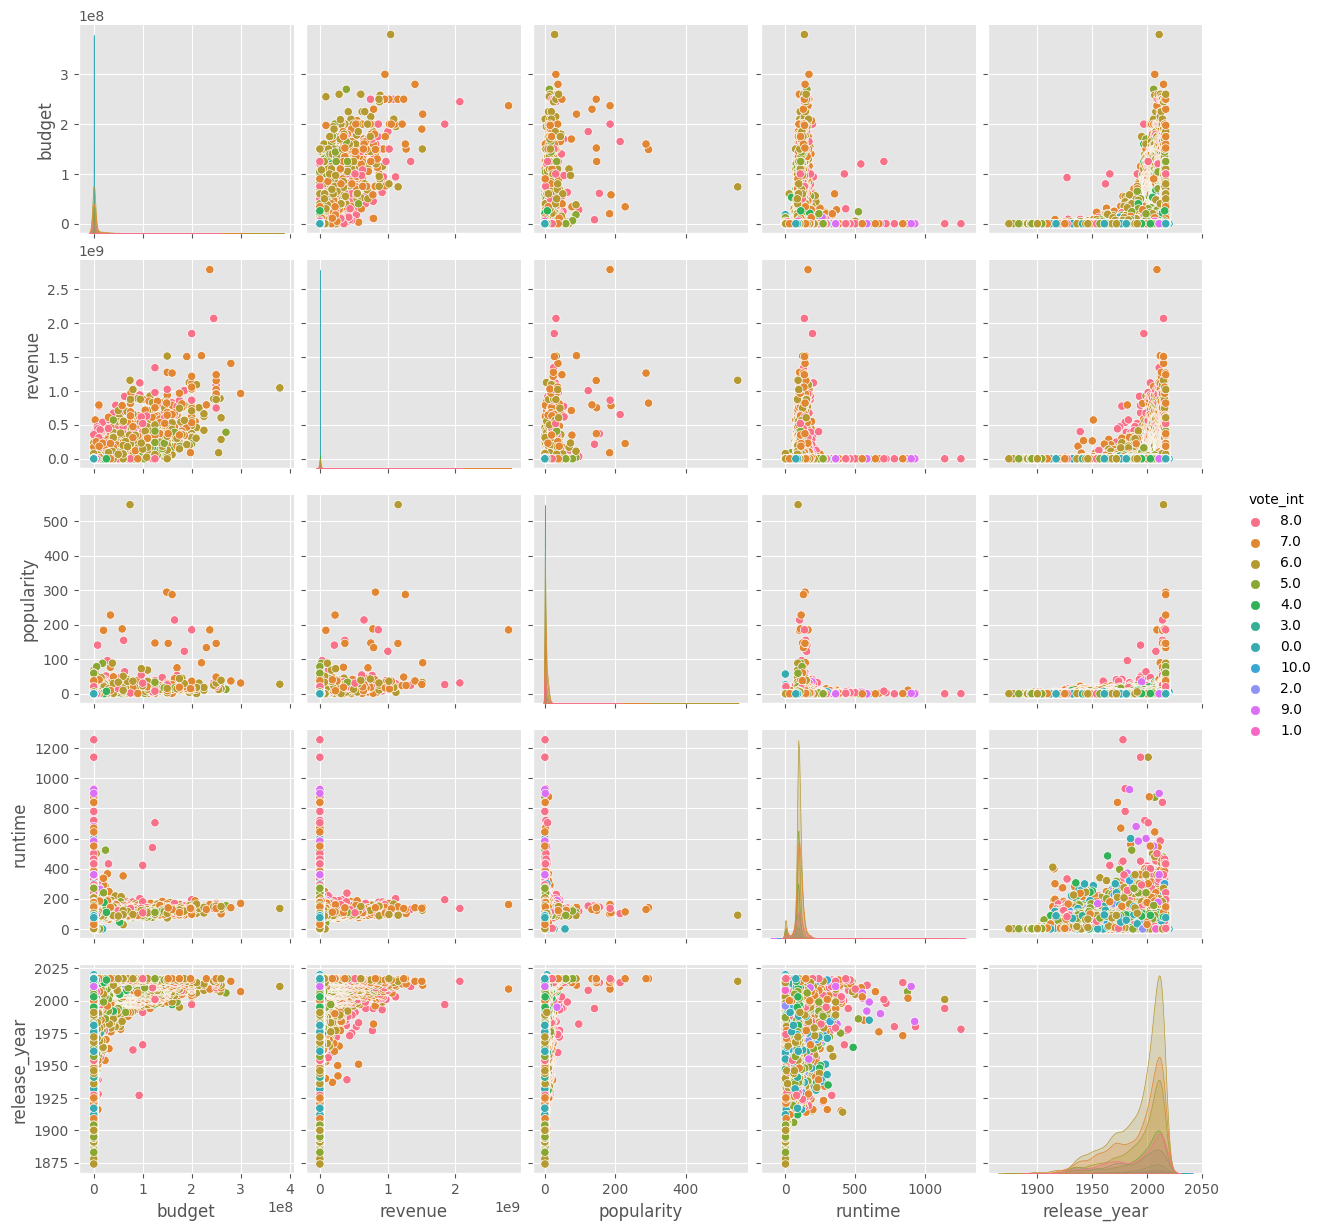

In [136]:
import seaborn as sns
import matplotlib.pylab as plt

plt.style.use('ggplot')

sns.pairplot(data,
             vars=['budget', 'revenue', 'popularity', 'runtime', 'release_year'],
             hue='vote_int')
plt.show()

Correlación entre algunas variables numéricas.

<Axes: >

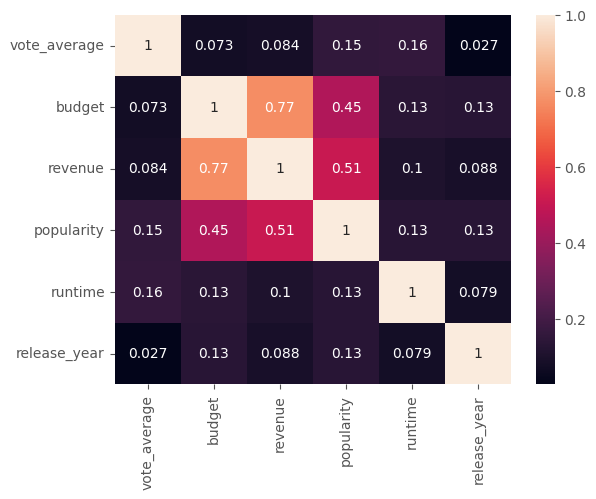

In [149]:
data_corr = data[['vote_average','budget', 'revenue', 'popularity', 'runtime', 'release_year']].corr()
sns.heatmap(data_corr, annot=True)

¿Cuáles son los géneros más populares?

In [150]:
movies_genre = []
for x in data['genres']:
    movies_genre += x

movies_genre_unique = list(set(movies_genre))

popularity_by_gender = {}
for n in movies_genre_unique:
    popularity_by_gender[n] = []
    for i, d in enumerate(data['genres']):
        if n in d:
            popularity_by_gender[n].append(data['popularity'][i])
    popularity_by_gender[n] = np.average(popularity_by_gender[n])

popularity_by_gender

{'Comedy': 3.2333445535430085,
 'Drama': 3.013975040094572,
 'War': 3.3312258498113207,
 'Fantasy': 5.3595324491817395,
 'Family': 4.736970723143474,
 'Thriller': 4.4887941659463,
 'Adventure': 5.995128121791216,
 'Animation': 4.721758674047374,
 'Documentary': 0.9505519903209374,
 'Mystery': 3.9526722150363787,
 'Crime': 4.148732278061225,
 'Horror': 3.561911142001711,
 'Action': 4.769173087535968,
 'Western': 2.6293207687140114,
 'Foreign': 0.7650079397664413,
 'Music': 2.55419116125,
 'Science Fiction': 5.00026974394237,
 'History': 3.4688251302791695,
 'Romance': 3.1207942396204036,
 'TV Movie': 2.04062490234375}

<Axes: >

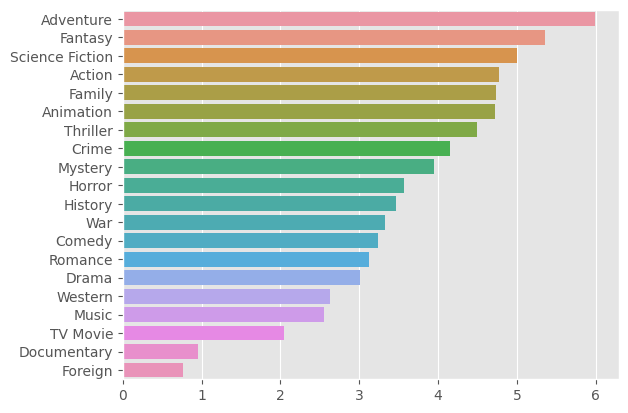

In [151]:
sns.barplot(x=list(popularity_by_gender.values()), y=list(popularity_by_gender.keys()), orient="h", order=sorted(popularity_by_gender.keys(), key=popularity_by_gender.get, reverse=True))

Vemos la distribución de películas por cantidad de votos para un posterior filtrado.

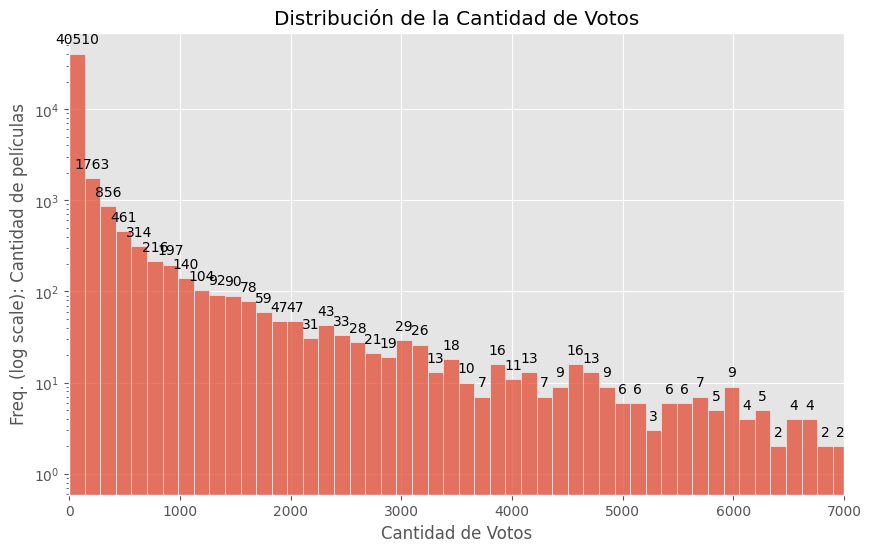

In [152]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura (ancho x alto)

# Crea el histograma con escala logarítmica
ax = sns.histplot(data['vote_count'], bins=100, log_scale=(False, True))

plt.xlabel('Cantidad de Votos')
plt.ylabel('Freq. (log scale): Cantidad de películas')
plt.title('Distribución de la Cantidad de Votos')

# Agrega etiquetas de texto encima de cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlim(0, 7000)
plt.show()

Popularidad por idioma original.

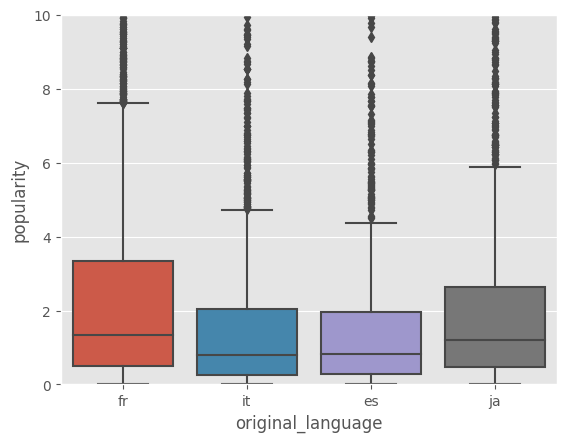

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorías deseadas de original_language
categorias_deseadas = ["en"] 
categorias_deseadas = ["es", "it", "fr", "ja"]  # Ejemplo: español, inglés, francés

# Filtrar los datos para incluir solo las categorías deseadas
data_filtrada = data[data["original_language"].isin(categorias_deseadas)]

# Trazar el gráfico de caja con los datos filtrados
sns.boxplot(x="original_language", y="popularity", data=data_filtrada)

# Establecer los límites del eje y (ajusta los valores según tus necesidades)
plt.ylim(0, 10)

# Mostrar el gráfico
plt.show()

#### Wordcloud de los títulos de las películas

804523


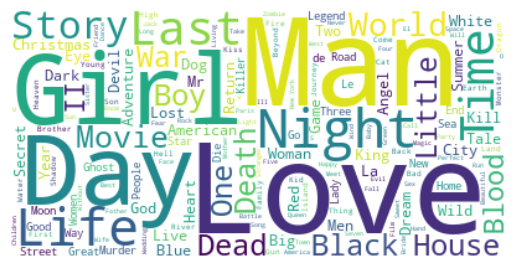

In [ ]:
from wordcloud import WordCloud

# Join all reviews:
text = " ".join(title for title in data["title"] if pd.notnull(title))
print(len(text))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## ML: Recommendation System 1

### Step 1: Preprocess the data

In [193]:
# Reducimos el número de registros para evitar que se muera el computador
# Criterio: Vote_average > 5, vote_count > 50, y eliminar nulos.
# Nos quedamos con 8378 registros

data_reduced = data[data["vote_count"] > 50]
data_reduced = data_reduced[data_reduced["vote_average"] > 5]
data_reduced.dropna(subset=["overview", "title"], inplace=True)
data_reduced.shape

(8378, 20)

In [194]:
# Creamos una función para filtrar del texto que ingresemos los signos de puntuación y los stopwords, y para pasar todo a minúsculas.
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords') # Descargamos el conjunto de stopwords en inglés
nltk.download('punkt') # Descargamos los datos requeridos para el tokenizador de oraciones en inglés
stop_words = set(stopwords.words('english'))  # Creamos un set de stopwords en inglés

def transform_sentence(sentence):
    sentence_new = sentence.translate(str.maketrans("", "", string.punctuation)).lower() # Remove punctuation and convert to lowercase

    words = nltk.word_tokenize(sentence_new) # Utilizamos este método para dividir la oración en palabras individuales
    filtered_sentence = " ".join([word for word in words if word.lower() not in stop_words]) # Utilizamos list comprehension para filtrar las palabras de la lista words y lo regresamos a string

    return filtered_sentence

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Milena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Milena\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [195]:
# Aplicamos la función de filtrado de texto a overview y title y las concateno en una sola columna.
data_reduced["overview_main_words"] = data_reduced["overview"].apply(lambda x: transform_sentence(x) if pd.notnull(x) else np.nan)
data_reduced["title_main_words"] = data_reduced["title"].apply(lambda x: transform_sentence(x) if pd.notnull(x) else np.nan)
data_reduced["main_words_for_rs"] = data_reduced["title_main_words"] + " " + data_reduced["overview_main_words"]
data_reduced.drop(columns=["overview_main_words", "title_main_words"], inplace=True)
data_reduced.head()

,belongs_to_collection,budget,genres,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,spoken_languages,status,tagline,title,vote_average,vote_count,return,release_year,director,main_words_for_rs
0,Toy Story Collection,30000000,"[Animation, Comedy, Family]",en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,...,[English],Released,NaN,Toy Story,7.7,5415.0,12.451801,1995,[John Lasseter],toy story led woody andys toys live happily ro...
1,NaN,65000000,"[Adventure, Fantasy, Family]",en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,...,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,4.043035,1995,[Joe Johnston],jumanji siblings judy peter discover enchanted...
2,Grumpy Old Men Collection,0,"[Romance, Comedy]",en,A family wedding reignites the ancient feud be...,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,...,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,0.000000,1995,[Howard Deutch],grumpier old men family wedding reignites anci...
4,Father of the Bride Collection,0,[Comedy],en,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,...,[English],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,0.000000,1995,[Charles Shyer],father bride part ii george banks recovered da...
5,NaN,60000000,"[Action, Crime, Drama, Thriller]",en,"Obsessive master thief, Neil McCauley leads a ...",17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],1995-12-15,187436818.0,...,"[English, Español]",Released,A Los Angeles Crime Saga,Heat,7.7,1886.0,3.123947,1995,[Michael Mann],heat obsessive master thief neil mccauley lead...


### Step 2: Create TF-IDF vectors

In [196]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data_reduced["main_words_for_rs"])

### Step 3: Calculate similarity with Cosine Similarity

In [197]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

### Step 4: Retrieve similar movies

In [ ]:
movie_index = 256  # Index of the movie you want to find similar movies for
similar_movies_indices = similarity_matrix[movie_index].argsort()[::-1][1:11]  # Exclude the movie itself, take top 10
similar_movies_scores = similarity_matrix[movie_index][similar_movies_indices]  # Retrieve the similarity scores for similar movies
similar_movies = data_reduced.iloc[similar_movies_indices][['title']].copy()
similar_movies['similarity_score'] = similar_movies_scores

print("Movie:", data_reduced["title"][movie_index])
print("Similar Movies:")
print(similar_movies)

## ML: Recommendation System 2

### Step 1: Preprocess the data

In [204]:
# Reducimos el número de registros para evitar que se muera el computador
# Criterio: Vote_average > 5, vote_count > 50, y eliminar nulos.
# Nos quedamos con 8402 registros

data_reduced = data[data["vote_count"] > 50]
data_reduced = data_reduced[data_reduced["vote_average"] > 5]
data_reduced.dropna(subset=["title", "genres", "director", "production_companies"], inplace=True)
data_reduced.shape

(8402, 20)

In [200]:
# Creamos una función para filtrar del texto que ingresemos los signos de puntuación y los stopwords, y para pasar todo a minúsculas.
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords') # Descargamos el conjunto de stopwords en inglés
nltk.download('punkt') # Descargamos los datos requeridos para el tokenizador de oraciones en inglés
stop_words = set(stopwords.words('english'))  # Creamos un set de stopwords en inglés

def transform_sentence(sentence):
    sentence_new = sentence.translate(str.maketrans("", "", string.punctuation)).lower() # Remove punctuation and convert to lowercase

    words = nltk.word_tokenize(sentence_new) # Utilizamos este método para dividir la oración en palabras individuales
    filtered_sentence = " ".join([word for word in words if word.lower() not in stop_words]) # Utilizamos list comprehension para filtrar las palabras de la lista words y lo regresamos a string

    return filtered_sentence

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Milena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Milena\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [205]:
# Aplicamos la función de filtrado de texto a overview y title y las concateno en una sola columna.
data_reduced["title_main_words"] = data_reduced["title"].apply(lambda x: transform_sentence(x) if pd.notnull(x) else np.nan)
data_reduced["genres_main_words"] = data_reduced["genres"].apply(lambda x: transform_sentence(' '.join(x)) if pd.notnull(' '.join(x)) else np.nan)
data_reduced["director_main_words"] = data_reduced["director"].apply(lambda x: transform_sentence(' '.join(x)) if pd.notnull(' '.join(x)) else np.nan)
data_reduced["company_main_words"] = data_reduced["production_companies"].apply(lambda x: transform_sentence(' '.join(x)) if pd.notnull(' '.join(x)) else np.nan)
data_reduced["main_words_for_rs"] = data_reduced["title_main_words"] + " " + data_reduced["genres_main_words"] + " " + data_reduced["director_main_words"] + " " + data_reduced["company_main_words"]
data_reduced.drop(columns=["title_main_words", "genres_main_words", "director_main_words", "company_main_words"], inplace=True)
data_reduced.head()

,belongs_to_collection,budget,genres,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,spoken_languages,status,tagline,title,vote_average,vote_count,return,release_year,director,main_words_for_rs
0,Toy Story Collection,30000000,"[Animation, Comedy, Family]",en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,...,[English],Released,NaN,Toy Story,7.7,5415.0,12.451801,1995,[John Lasseter],toy story animation comedy family john lassete...
1,NaN,65000000,"[Adventure, Fantasy, Family]",en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,...,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,4.043035,1995,[Joe Johnston],jumanji adventure fantasy family joe johnston ...
2,Grumpy Old Men Collection,0,"[Romance, Comedy]",en,A family wedding reignites the ancient feud be...,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,...,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,0.000000,1995,[Howard Deutch],grumpier old men romance comedy howard deutch ...
4,Father of the Bride Collection,0,[Comedy],en,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,...,[English],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,0.000000,1995,[Charles Shyer],father bride part ii comedy charles shyer sand...
5,NaN,60000000,"[Action, Crime, Drama, Thriller]",en,"Obsessive master thief, Neil McCauley leads a ...",17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],1995-12-15,187436818.0,...,"[English, Español]",Released,A Los Angeles Crime Saga,Heat,7.7,1886.0,3.123947,1995,[Michael Mann],heat action crime drama thriller michael mann ...


### Step 2: Create TF-IDF vectors

In [206]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data_reduced["main_words_for_rs"])

### Step 3: Calculate similarity with Nearest Neighbors

In [212]:
from sklearn.neighbors import NearestNeighbors

nn_model = NearestNeighbors(metric="cosine")
nn_model.fit(tfidf_matrix)

Princess Mononoke, 2887


['Ordet',
 'Vampyr',
 'The Messenger: The Story of Joan of Arc',
 'Two Women',
 'Autumn in New York']

### Step 4: Retrieve similar movies

In [213]:
n = 5
title = "Princess Mononoke"
index_id = data_reduced[data_reduced["title"] == title].index[0]
print(f"{title}, {index_id}")
distances, neighbor_indices = nn_model.kneighbors(tfidf_matrix[index_id], n_neighbors=n+1)
neighbor_indices = neighbor_indices.flatten()

top_peliculas = data_reduced["title"].iloc[neighbor_indices[1:6]].tolist()
top_peliculas

Princess Mononoke, 2887


['Ordet',
 'Vampyr',
 'The Messenger: The Story of Joan of Arc',
 'Two Women',
 'Autumn in New York']

### Working on...

In [33]:
# Set the diagonal elements (self-similarity) to a very low value
np.fill_diagonal(similarity_matrix, -np.inf)

# Get the indices of the top 100 cosine similarities (excluding self-similarity)
num_movies = similarity_matrix.shape[0]
top_100_indices = np.argsort(similarity_matrix, axis=None)[-100:]

# Reshape the indices to obtain the row and column indices
row_indices, col_indices = np.unravel_index(top_100_indices, similarity_matrix.shape)

# Get the top 100 cosine similarities and their corresponding movie names
top_100_similarities = similarity_matrix[row_indices, col_indices]
movie_pairs = [(data_reduced.iloc[row_idx]['title'], data_reduced.iloc[col_idx]['title']) for row_idx, col_idx in zip(row_indices, col_indices) if row_idx != col_idx]

# Print the top 100 movie pairs and their corresponding similarities
for similarity, movie_pair in zip(top_100_similarities, movie_pairs):
    movie1, movie2 = movie_pair
    print("Movie Pair:", movie1, "-", movie2)
    print("Similarity:", similarity)
    print("---")

Movie Pair: Pokémon: Spell of the Unknown - Pokémon: Spell of the Unknown
Similarity: 1.0
---
Movie Pair: Black Gold - Black Gold
Similarity: 1.0
---
Movie Pair: Pokémon 4Ever: Celebi - Voice of the Forest - Pokémon 4Ever: Celebi - Voice of the Forest
Similarity: 1.0
---
Movie Pair: Black Gold - Black Gold
Similarity: 1.0
---
Movie Pair: Pokémon: Spell of the Unknown - Pokémon: Spell of the Unknown
Similarity: 1.0
---
Movie Pair: Black Gold - Black Gold
Similarity: 1.0
---
Movie Pair: Fantozzi Still Suffers - Mais qui a tué Pamela Rose ?
Similarity: 1.0
---
Movie Pair: Black Gold - Black Gold
Similarity: 1.0
---
Movie Pair: Pokémon: Spell of the Unknown - Pokémon: Spell of the Unknown
Similarity: 1.0
---
Movie Pair: Pokémon 4Ever: Celebi - Voice of the Forest - Pokémon 4Ever: Celebi - Voice of the Forest
Similarity: 1.0
---
Movie Pair: Tanguy - Mais qui a tué Pamela Rose ?
Similarity: 1.0
---
Movie Pair: Grande, grosso e Verdone - Fantozzi Still Suffers
Similarity: 1.0
---
Movie Pair: 